In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x26b16a8b910>,
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1}

In [13]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x26b16a0ad00>,
 'id': 1,
 'elevation': 3.0,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'latitude': 21.2716}

In [14]:
for row in session.query(Station.id, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).limit(15).all():
    print(row)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [16]:
for row in session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).order_by(Measurement.date.desc()).limit(15).all():
    print(row)

(2724, 'USC00519397', '2017-08-23', 0.0, 81.0)
(7635, 'USC00514830', '2017-08-23', 0.0, 82.0)
(12187, 'USC00519523', '2017-08-23', 0.08, 82.0)
(19550, 'USC00516128', '2017-08-23', 0.45, 76.0)
(2723, 'USC00519397', '2017-08-22', 0.0, 82.0)
(12186, 'USC00519523', '2017-08-22', 0.0, 82.0)
(19549, 'USC00516128', '2017-08-22', 0.5, 76.0)
(2722, 'USC00519397', '2017-08-21', 0.0, 81.0)
(7634, 'USC00514830', '2017-08-21', 0.02, 79.0)
(12185, 'USC00519523', '2017-08-21', None, 82.0)
(19548, 'USC00516128', '2017-08-21', 0.56, 76.0)
(2721, 'USC00519397', '2017-08-20', 0.0, 81.0)
(7633, 'USC00514830', '2017-08-20', 0.01, 80.0)
(19547, 'USC00516128', '2017-08-20', None, 78.0)
(2720, 'USC00519397', '2017-08-19', 0.0, 79.0)


In [17]:
# Calculate the date 1 year ago from the last data point in the database
last_date = dt.datetime(2017, 8, 23)
one_year_date = last_date - dt.timedelta(days=365)
print("Last 12 Months: ", one_year_date)

Last 12 Months:  2016-08-23 00:00:00


In [18]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_date).all()
for result in results:
    print(f"Date: {result.date}, Precipitation: {result.prcp}")

ecipitation: 1.32
Date: 2017-02-08, Precipitation: 0.0
Date: 2017-02-09, Precipitation: 0.0
Date: 2017-02-10, Precipitation: 0.0
Date: 2017-02-11, Precipitation: 1.73
Date: 2017-02-12, Precipitation: 2.98
Date: 2017-02-13, Precipitation: 0.01
Date: 2017-02-14, Precipitation: 0.0
Date: 2017-02-15, Precipitation: 0.01
Date: 2017-02-16, Precipitation: 0.73
Date: 2017-02-17, Precipitation: 0.13
Date: 2017-02-18, Precipitation: 0.0
Date: 2017-02-19, Precipitation: 0.09
Date: 2017-02-20, Precipitation: 0.0
Date: 2017-02-21, Precipitation: 0.0
Date: 2017-02-22, Precipitation: 0.06
Date: 2017-02-23, Precipitation: 0.0
Date: 2017-02-24, Precipitation: 0.0
Date: 2017-02-25, Precipitation: 0.0
Date: 2017-02-26, Precipitation: 0.0
Date: 2017-02-27, Precipitation: 0.0
Date: 2017-02-28, Precipitation: 0.04
Date: 2017-03-01, Precipitation: 2.12
Date: 2017-03-02, Precipitation: 1.88
Date: 2017-03-03, Precipitation: 0.27
Date: 2017-03-04, Precipitation: 0.0
Date: 2017-03-05, Precipitation: 0.41
Date: 2

In [19]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index('date', inplace=True, )
# Sort the dataframe by date
df=df.sort_index()
df

,precipitation
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


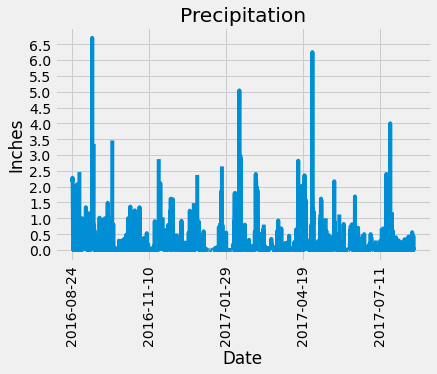

<Figure size 432x432 with 0 Axes>

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90, legend=False)
plt.yticks(np.arange(0, 7, step=0.5))
plt.title('Precipitation')
plt.ylabel('Inches')
plt.xlabel('Date')
plt.figure(figsize=(6, 6))
plt.show()

In [21]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [23]:
# Design a query to show how many stations are available in this dataset?
station_table=session.query(func.count(Station.station)).all()
station_table

[(9)]

In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?  
# List the stations and the counts in descending order.
sel = [Measurement.station, 
       func.count(Measurement.station)
      ]
station_count = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?   #USC00519281
sel = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs) 
       ]
station_temp = session.query(*sel).\
    filter(Measurement.station == "USC00519281").all()
station_temp


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [26]:
#Design a query to retrieve the last 12 months of temperature observation data (TOBS).

date1 = dt.datetime(2016, 8, 23)

sel = [Measurement.station, 
       func.count(Measurement.station) 
      ]
year_temp = session.query(*sel).\
    filter(Measurement.date >= date1).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
year_temp

#Filter by the station with the highest number of observations.

[('USC00519397', 360),
 ('USC00519281', 351),
 ('USC00516128', 348),
 ('USC00513117', 342),
 ('USC00519523', 336),
 ('USC00514830', 304),
 ('USC00517948', 182)]

In [27]:
#Plot the results as a histogram with `bins=12`.
sel = [Measurement.date, Measurement.tobs]
temp_year = session.query(*sel).\
    filter(Measurement.date >= one_year_date).filter(Measurement.station == "USC00519281").all()
#temp_year

In [28]:
temp_year_df = pd.DataFrame(temp_year, columns=['date', 'tobs'])
temp_year_df.set_index('date', inplace=True, )
# Sort the dataframe by date
temp_year_df=temp_year_df.sort_index()
#temp_year_df

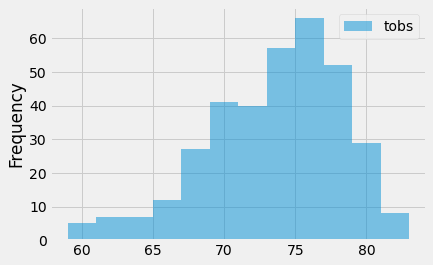

In [29]:
ax = temp_year_df.plot.hist(bins=12, alpha=0.5)

In [30]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [31]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [32]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [33]:
 session.query(Measurement.station, Station.station).limit(10).all()

[('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397')]

In [34]:
 same_station = session.query(Measurement, Station).filter(Measurement.station == Station.station).limit(10).all()

for record in same_station:
    (measurement, station) = record
    print(measurement.station)
    print(station.station)

USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397


In [35]:
#follow class example for titanic
#hawaii example doesn't have start and stop but we did with variable rule example passing in a superhero put in brackets tell it a variable name like start date
#for start date and enc date use two sections in brackets startdate/enddate and two variables passed in by def justing league [start date, end date];
##8 and #9 have the example of 
## instead of function being blank def passengers ():


In [36]:
sel = [Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs, Station.latitude, Station.longitude, Station.elevation]
same_station = session.query(*sel).filter(Measurement.station == Station.station).limit(10).all()


        